In [1]:
from pyforest import lazy_imports

In [2]:
lazy_imports()

['from sklearn.model_selection import RandomizedSearchCV',
 'from sklearn.linear_model import RidgeCV',
 'from sklearn.ensemble import RandomForestClassifier',
 'import numpy as np',
 'from sklearn.cluster import KMeans',
 'from sklearn.feature_extraction.text import TfidfVectorizer',
 'from sklearn.model_selection import KFold',
 'import os',
 'from xlrd import open_workbook',
 'import tqdm',
 'import matplotlib.pyplot as plt',
 'from sklearn.preprocessing import RobustScaler',
 'from sklearn.linear_model import Ridge',
 'from sklearn.preprocessing import LabelEncoder',
 'import re',
 'from pyspark import SparkContext',
 'import pickle',
 'from pathlib import Path',
 'from sklearn.decomposition import PCA',
 'from sklearn.ensemble import GradientBoostingRegressor',
 'import skimage',
 'import xgboost as xgb',
 'from statsmodels.tsa.arima_model import ARIMA',
 'from sklearn.feature_extraction.text import CountVectorizer',
 'from sklearn.linear_model import ElasticNetCV',
 'import datet

In [3]:
import warnings
warnings.filterwarnings('ignore')

In [4]:
train = pd.read_csv('bigmart_train.csv')
test = pd.read_csv('bigmart_test.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [5]:
print('Train_data:',train.shape)
print('Test_data:',test.shape)

Train_data: (8523, 12)
Test_data: (5681, 11)


In [6]:
train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [7]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
Item_Weight,7060.0,12.857645,4.643456,4.555,8.773750,12.600000,16.850000,21.350000
Item_Visibility,8523.0,0.066132,0.051598,0.000,0.026989,0.053931,0.094585,0.328391
Item_MRP,8523.0,140.992782,62.275067,31.290,93.826500,143.012800,185.643700,266.888400
Outlet_Establishment_Year,8523.0,1997.831867,8.371760,1985.000,1987.000000,1999.000000,2004.000000,2009.000000
Item_Outlet_Sales,8523.0,2181.288914,1706.499616,33.290,834.247400,1794.331000,3101.296400,13086.964800


In [8]:
train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [9]:
test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [10]:
train['source'] = 'train'
test['source'] = 'test'
df=pd.concat([train,test], ignore_index=True)

<IPython.core.display.Javascript object>

In [11]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800,train
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train
...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test
14201,NCO17,10.00,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1,NaN,test
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1,NaN,test


In [12]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  2439
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  4016
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

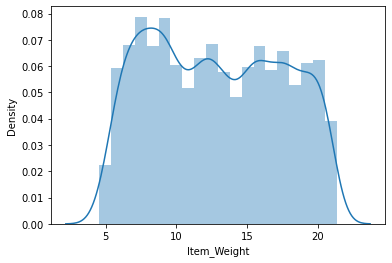

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

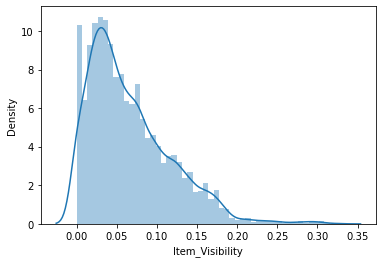

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

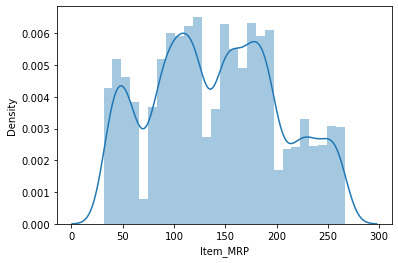

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

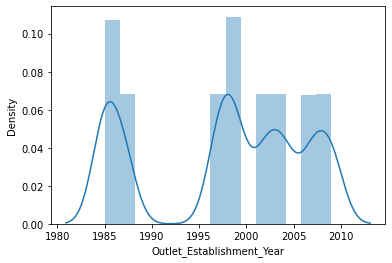

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

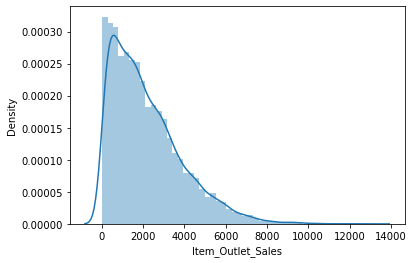

In [13]:
for i in train.describe().columns:
    sns.distplot(train[i].dropna())
    plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

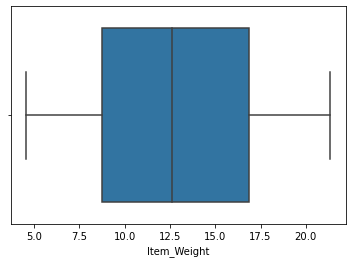

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

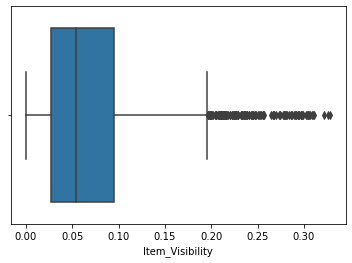

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

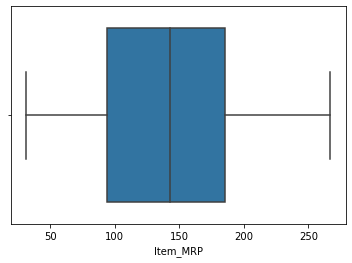

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

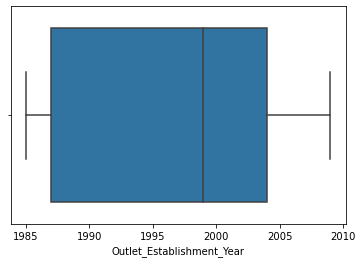

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

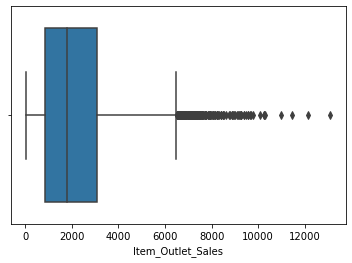

In [14]:
for i in train.describe().columns:
    sns.boxplot(train[i].dropna())
    plt.show()
    

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

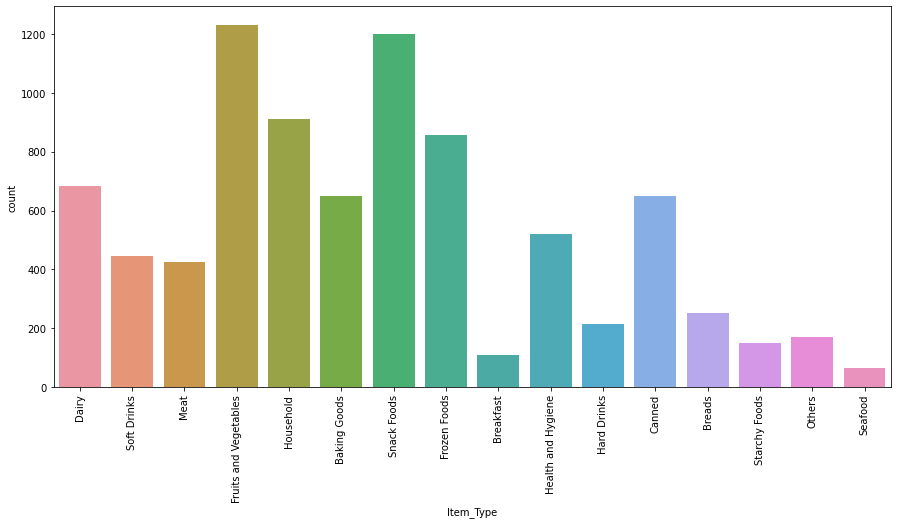

In [15]:
plt.figure(figsize=(15,7))
sns.countplot(train['Item_Type'])
plt.xticks(rotation=90)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

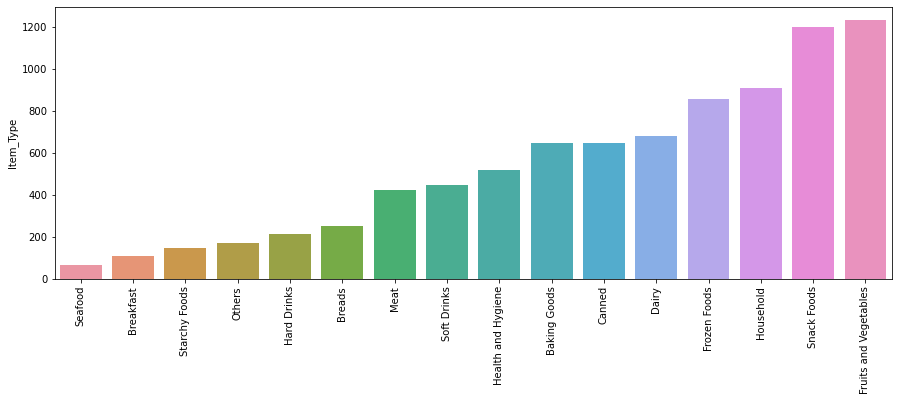

In [16]:
plt.figure(figsize=(15,5))
sns.barplot(x=train['Item_Type'].value_counts().sort_values().index,y=train['Item_Type'].value_counts().sort_values())
plt.xticks(rotation=90)
plt.show()

In [17]:
train['Item_Type'].value_counts().sort_values()

Seafood                    64
Breakfast                 110
Starchy Foods             148
Others                    169
Hard Drinks               214
Breads                    251
Meat                      425
Soft Drinks               445
Health and Hygiene        520
Baking Goods              648
Canned                    649
Dairy                     682
Frozen Foods              856
Household                 910
Snack Foods              1200
Fruits and Vegetables    1232
Name: Item_Type, dtype: int64

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

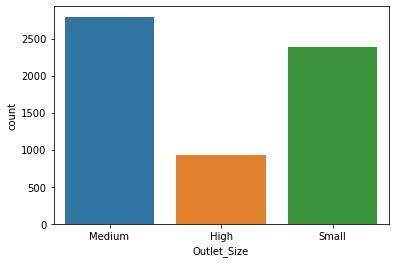

In [18]:
sns.countplot(train['Outlet_Size'])

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

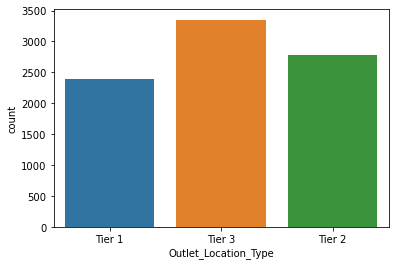

In [19]:
sns.countplot(train['Outlet_Location_Type'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

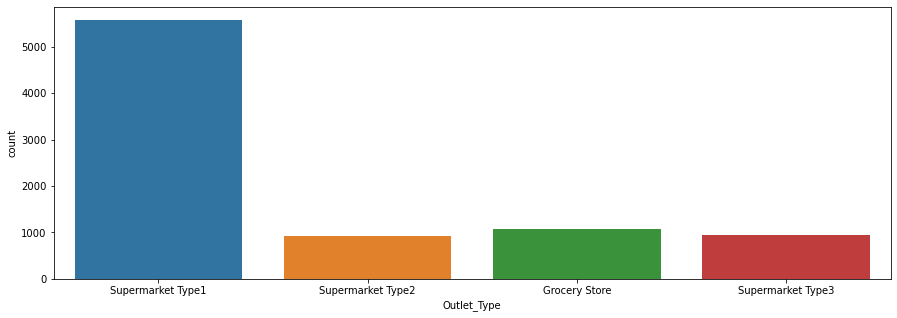

In [20]:
plt.figure(figsize=(15,5))
sns.countplot(train['Outlet_Type'])

In [21]:
train['Outlet_Type'].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

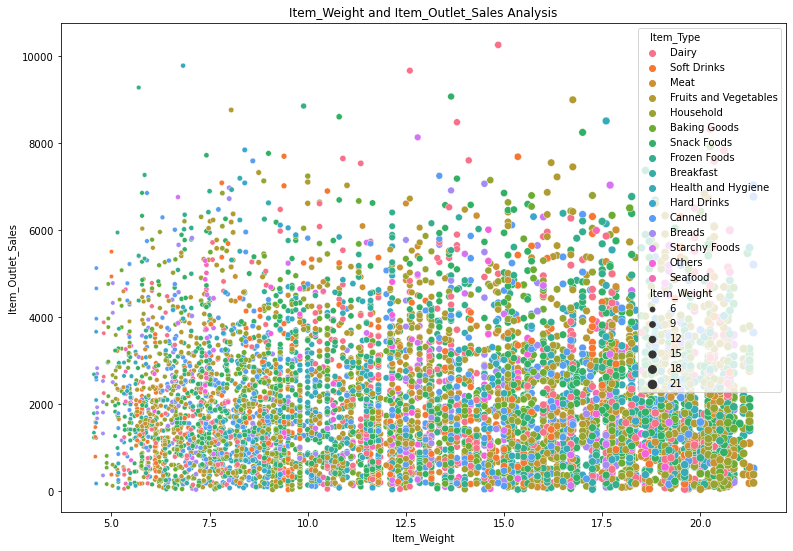

In [22]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Weight', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:title={'center':'Item_Weight and Item_Outlet_Sales Analysis'}, xlabel='Item_Weight', ylabel='Item_Outlet_Sales'>

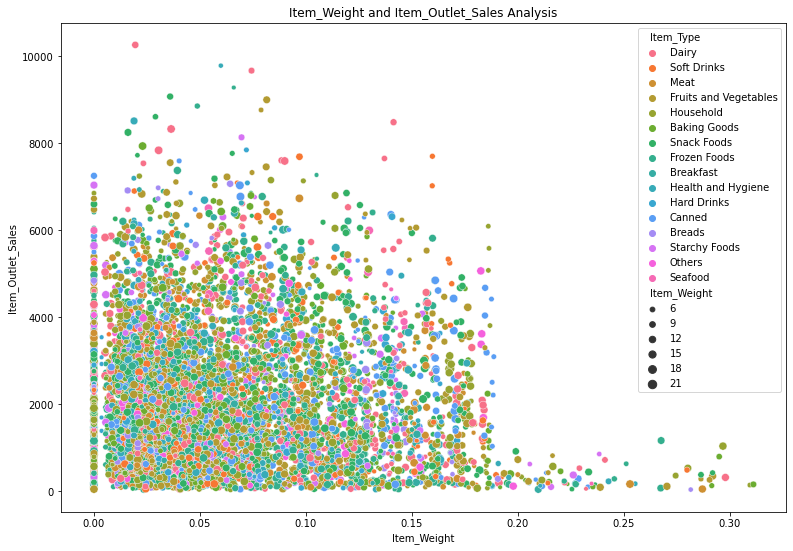

In [23]:
plt.figure(figsize=(13,9))
plt.xlabel('Item_Weight')
plt.ylabel('Item_Outlet_Sales')
plt.title('Item_Weight and Item_Outlet_Sales Analysis')
sns.scatterplot(x='Item_Visibility', y='Item_Outlet_Sales',hue='Item_Type', size='Item_Weight',data=train)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

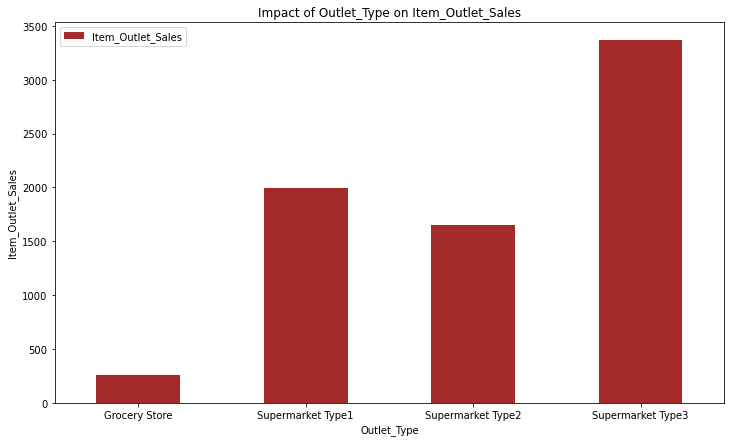

In [24]:
Item_Type_pivot = \
train.pivot_table(index='Outlet_Type', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='brown',figsize=(12,7))
plt.xlabel('Outlet_Type')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Outlet_Type on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

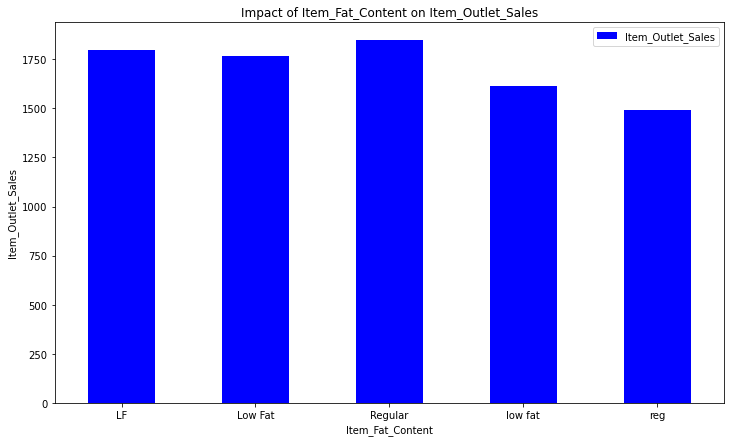

In [25]:
Item_Type_pivot = \
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

Item_Type_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [26]:
train.pivot_table(index='Item_Fat_Content', values="Item_Outlet_Sales", aggfunc=np.median)

<IPython.core.display.Javascript object>

,Item_Outlet_Sales
Item_Fat_Content,
LF,1797.6600
Low Fat,1765.7016
Regular,1845.5976
low fat,1614.2321
reg,1492.7236


In [27]:
df['Item_Fat_Content'].value_counts()

Low Fat    8485
Regular    4824
LF          522
reg         195
low fat     178
Name: Item_Fat_Content, dtype: int64

In [28]:
df['Item_Fat_Content'] = df['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

In [29]:
train['Item_Fat_Content'] = train['Item_Fat_Content'].replace({'LF':'Low Fat','reg':'Regular','low fat':'Low Fat',})

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

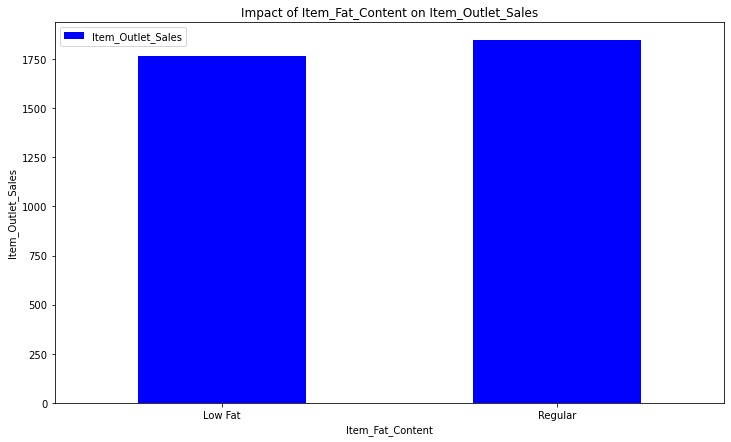

In [30]:
Item_Fat_Content_pivot =\
train.pivot_table(index='Item_Fat_Content',values='Item_Outlet_Sales',aggfunc=np.median)

Item_Fat_Content_pivot.plot(kind='bar',color='blue',figsize=(12,7))
plt.xlabel('Item_Fat_Content')
plt.ylabel("Item_Outlet_Sales")
plt.title("Impact of Item_Fat_Content on Item_Outlet_Sales")
plt.xticks(rotation=0)
plt.show()

In [31]:
train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<AxesSubplot:>

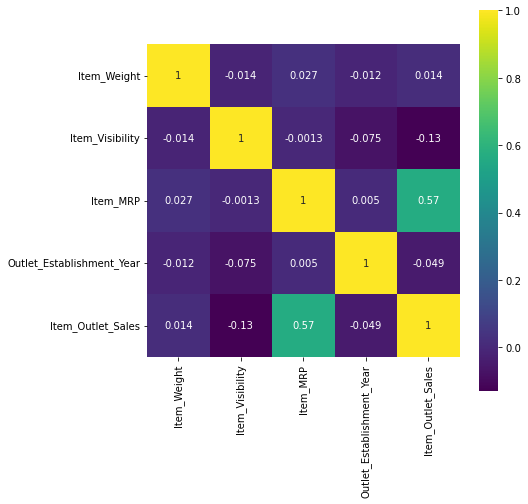

In [32]:
plt.figure(figsize=(7,7))
sns.heatmap(train.corr(),square=True,annot=True, cmap='viridis')

In [33]:
df['Item_Weight'].mean() #we will replace the NaN values with this mean

df['Item_Weight'].fillna(df['Item_Weight'].mean(), inplace=True) #missing values have been replaced with the mean using the fillna function.

In [34]:
df['Outlet_Size'].value_counts()

Medium    4655
Small     3980
High      1553
Name: Outlet_Size, dtype: int64

In [35]:
df['Outlet_Size'].fillna('Medium', inplace=True)

In [36]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                     0
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                     0
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales            5681
source                          0
dtype: int64

In [37]:
df[df['Item_Visibility']==0]['Item_Visibility'].count()

879

In [38]:
df['Item_Visibility'].fillna(df['Item_Visibility'].median(), inplace=True)

In [39]:
df['Outlet_Establishment_Year'].value_counts()

1985    2439
1987    1553
1999    1550
1997    1550
2004    1550
2002    1548
2009    1546
2007    1543
1998     925
Name: Outlet_Establishment_Year, dtype: int64

In [40]:
df['Outlet_Years'] = 2009-df['Outlet_Establishment_Year']
df['Outlet_Years'].describe()

count    14204.000000
mean        11.169319
std          8.371664
min          0.000000
25%          5.000000
50%         10.000000
75%         22.000000
max         24.000000
Name: Outlet_Years, dtype: float64

In [41]:
df['Item_Type'].value_counts()


Fruits and Vegetables    2013
Snack Foods              1989
Household                1548
Frozen Foods             1426
Dairy                    1136
Baking Goods             1086
Canned                   1084
Health and Hygiene        858
Meat                      736
Soft Drinks               726
Breads                    416
Hard Drinks               362
Others                    280
Starchy Foods             269
Breakfast                 186
Seafood                    89
Name: Item_Type, dtype: int64

In [42]:
df['Item_Identifier'].value_counts()

FDU15    10
FDS25    10
FDA38    10
FDW03    10
FDJ10    10
         ..
FDR51     7
FDM52     7
DRN11     7
FDH58     7
NCW54     7
Name: Item_Identifier, Length: 1559, dtype: int64

In [43]:
#Changing only the first 2 characters (i.e. the category ID)

df['New_Item_type'] = df['Item_Identifier'].apply(lambda x: x[0:2])

In [44]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,FD
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,DR
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,FD
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,FD
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,NC


In [45]:
#Rename them to more intuitive  categories:

df['New_Item_type'] = df['New_Item_type'].map({'FD':'Food','NC':'Non-Consumable','DR':'Drinks'})
df['New_Item_type'].value_counts()

Food              10201
Non-Consumable     2686
Drinks             1317
Name: New_Item_type, dtype: int64

In [46]:
df.loc[df['New_Item_type']=='Non-Consumable','Item_Fat_Content']= "Non-Edible"
df['Item_Fat_Content'].value_counts()

Low Fat       6499
Regular       5019
Non-Edible    2686
Name: Item_Fat_Content, dtype: int64

In [47]:
item_visib_avg = df.pivot_table(values='Item_Visibility', index='Item_Identifier')

In [48]:
function = lambda x: x['Item_Visibility']/item_visib_avg['Item_Visibility'][item_visib_avg.index == x['Item_Identifier']][0]
df['item_visib_avg'] = df.apply(function,axis=1).astype(float)

In [49]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales,source,Outlet_Years,New_Item_type,item_visib_avg
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380,train,10,Food,0.931078
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228,train,0,Drinks,0.933420
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700,train,10,Food,0.960069
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800,train,11,Food,0.000000
4,NCD19,8.93,Non-Edible,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052,train,22,Non-Consumable,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14199,FDB58,10.50,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1,NaN,test,12,Food,0.874729
14200,FDD47,7.60,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2,NaN,test,0,Food,0.878292
14201,NCO17,10.00,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1,NaN,test,7,Non-Consumable,1.162245
14202,FDJ26,15.30,Regular,0.000000,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1,NaN,test,2,Food,0.000000


In [50]:
from sklearn.preprocessing import LabelEncoder
label = LabelEncoder()

#New variable for outlet
df['Outlet'] = label.fit_transform(df['Outlet_Identifier'])
varib = ['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet']
for i in varib:
  df[i] = label.fit_transform(df[i])


In [51]:
#Dummy Variables:

df = pd.get_dummies(df, columns =['Item_Fat_Content','Outlet_Location_Type','Outlet_Size','New_Item_type','Outlet_Type','Outlet'])
df.dtypes 

<IPython.core.display.Javascript object>

Item_Identifier               object
Item_Weight                  float64
Item_Visibility              float64
Item_Type                     object
Item_MRP                     float64
Outlet_Identifier             object
Outlet_Establishment_Year      int64
Item_Outlet_Sales            float64
source                        object
Outlet_Years                   int64
item_visib_avg               float64
Item_Fat_Content_0             uint8
Item_Fat_Content_1             uint8
Item_Fat_Content_2             uint8
Outlet_Location_Type_0         uint8
Outlet_Location_Type_1         uint8
Outlet_Location_Type_2         uint8
Outlet_Size_0                  uint8
Outlet_Size_1                  uint8
Outlet_Size_2                  uint8
New_Item_type_0                uint8
New_Item_type_1                uint8
New_Item_type_2                uint8
Outlet_Type_0                  uint8
Outlet_Type_1                  uint8
Outlet_Type_2                  uint8
Outlet_Type_3                  uint8
O

In [52]:
df.drop(['Item_Type','Outlet_Establishment_Year'],axis=1, inplace=True)

In [53]:
train = df.loc[df['source'] == 'train']
test = df.loc[df['source'] == 'test']

In [54]:
train.drop(['source'],axis=1,inplace=True)

In [55]:
test.drop(['Item_Outlet_Sales','source'],axis=1,inplace=True)

In [56]:
X_train = train.drop(['Item_Outlet_Sales','Item_Identifier','Outlet_Identifier'],axis=1)
y_train = train['Item_Outlet_Sales']
X_test = test.drop(['Item_Identifier','Outlet_Identifier'],axis=1).copy()

In [57]:
from sklearn.linear_model import LinearRegression

lr = LinearRegression(normalize=True)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

56

In [58]:
from sklearn.tree import DecisionTreeRegressor

lr = DecisionTreeRegressor(max_depth=15, min_samples_leaf=100)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

62

In [59]:
from sklearn.ensemble import RandomForestRegressor

lr = RandomForestRegressor(max_depth=15, min_samples_leaf=100)

lr.fit(X_train,y_train)

lr_pred = lr.predict(X_test)
lr_accuracy = round(lr.score(X_train,y_train)*100)
lr_accuracy

61

In [60]:
from xgboost import XGBRegressor

model = XGBRegressor(n_estimators = 100, learning_rate=0.05)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
model.score(X_train, y_train)*100

67.72716943174717